In [30]:
import numpy as np

In [31]:
def f(x, u):
    return 3*u/(2*x) + 3/2 * (x*u**(1/3))
u0 = 1/10
n=10
a=1
b=2

In [32]:
def euler(a, b, n, f, y0):
    h = (b - a) / n
    x = [a + h*i for i in range(n+1)]
    y = [y0]
    for i in range(n):
        y.append(y[i] + h*f(x[i], y[i]))
    return x, y

sol_eu = euler(a, b, n, f, u0)
print('Метод Эйлера')
for x, y in zip(sol_eu[0], sol_eu[1]):
    print(f'u({x:.2f}) = {y:.8f}')

Метод Эйлера
u(1.00) = 0.10000000
u(1.10) = 0.18462383
u(1.20) = 0.30375336
u(1.30) = 0.46272090
u(1.40) = 0.66693712
u(1.50) = 0.92187137
u(1.60) = 1.23303927
u(1.70) = 1.60599423
u(1.80) = 2.04632140
u(1.90) = 2.55963311
u(2.00) = 3.15156530


In [33]:
def runge_cutta(a, b, n, f, y0):
    h = (b - a) / n
    x = [a + h*i for i in range(n+1)]
    y = [y0]
    for j in range(n):
        y.append(y[j] + h*( 1/3 * f(x[j], y[j]) + 2/3 * f(x[j] + 3/4*h, y[j] + h/2  * f(x[j], y[j]))))

    return x, y
                 
sol_rc = runge_cutta(a, b, n, f, u0)
print('Метод Рунге-Кутта')
for x, y in zip(sol_rc[0], sol_rc[1]):
    print(f'u({x:.2f}) = {y:.8f}')

Метод Рунге-Кутта
u(1.00) = 0.10000000
u(1.10) = 0.19757116
u(1.20) = 0.33554255
u(1.30) = 0.51949524
u(1.40) = 0.75512874
u(1.50) = 1.04820558
u(1.60) = 1.40452663
u(1.70) = 1.82991849
u(1.80) = 2.33022633
u(1.90) = 2.91130945
u(2.00) = 3.57903843


In [34]:
def simple_it(f, eps, y0):
    y1 = f(y0)
    while abs(y1-y0) > eps:
        y0 = y1
        y1 = f(y0)
    return y1



def adams(a, b, n, f, y0):
    h = (b-a)/n
    x = [a + h*i for i in range(n+1)]
    y = [y0]
    # Начало таблицы
    y_1_3 = y[0] + h/3 * f(x[0], y[0])
    y_2_3 = y[0] + 2*h/3 * f(x[0] + 1/3 *h, y_1_3)
    y1 = y[0] + h/4*f(x[0], y[0]) + 3*h/4*f(x[0] + 2/3 *h, y_2_3)
    y.append(y1)
    # Метод Адамса
    for j in range(1, n):
        # Реализация метода простой итерации
        y_new = simple_it(
            lambda y_j: y[j] + h/12 * (5 * f(x[j+1], y_j) + 8*f(x[j], y[j]) - f(x[j-1], y[j-1]))
            , h**5, y[j]
        )
        # 
        y.append(y_new)
    return x, y
        
sol_ad = adams(a, b, n, f, u0)
print('Метод Адамса')
for x, y in zip(sol_ad[0], sol_ad[1]):
    print(f'u({x:.2f}) = {y:.8f}')


Метод Адамса
u(1.00) = 0.10000000
u(1.10) = 0.20425959
u(1.20) = 0.35182950
u(1.30) = 0.54830671
u(1.40) = 0.79953731
u(1.50) = 1.11143367
u(1.60) = 1.48994007
u(1.70) = 1.94101942
u(1.80) = 2.47064605
u(1.90) = 3.08480156
u(2.00) = 3.78947239


In [35]:
def increase_accuracy(a, b, n, f, y0):
    h = (b - a) / n
    x = [a + h*i for i in range(n+1)]
    y = [y0]
    for j in range(n):
        y_half = y[j] + h/2 * f(x[j], y[j])
        y.append(y[j] + h * f(x[j] + 1/2*h, y_half))

    return x, y

sol_ia = increase_accuracy(a, b, n, f, u0)
print('Метод последовательного повышения порядка точности')
for x, y in zip(sol_ia[0], sol_ia[1]):
    print(f'u({x:.2f}) = {y:.8f}')

Метод последовательного повышения порядка точности
u(1.00) = 0.10000000
u(1.10) = 0.20255977
u(1.20) = 0.34787642
u(1.30) = 0.54166753
u(1.40) = 0.78978465
u(1.50) = 1.09814089
u(1.60) = 1.47268153
u(1.70) = 1.91937019
u(1.80) = 2.44418163
u(1.90) = 3.05309778
u(2.00) = 3.75210530


In [36]:
print('Адамс - Эйлер:')
print(np.abs(np.array(sol_ad[1]) - np.array(sol_eu[1])))
print('Адамс - Последовательное повышение точности:')
print(np.abs(np.array(sol_ad[1]) - np.array(sol_ia[1])))
print('Адамс - Рунге-Кутта:')
print(np.abs(np.array(sol_ad[1]) - np.array(sol_rc[1])))

Адамс - Эйлер:
[0.         0.01963576 0.04807614 0.0855858  0.13260019 0.1895623
 0.2569008  0.33502519 0.42432465 0.52516845 0.6379071 ]
Адамс - Последовательное повышение точности:
[0.         0.00169982 0.00395308 0.00663917 0.00975265 0.01329278
 0.01725854 0.02164924 0.02646443 0.03170378 0.03736709]
Адамс - Рунге-Кутта:
[0.         0.00668844 0.01628694 0.02881147 0.04440857 0.0632281
 0.08541344 0.11110093 0.14041973 0.17349211 0.21043396]


Построим графики функций

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = (10, 6)

In [38]:
x = np.linspace(1, 2, 11)
f = lambda x: ((-0.784557 + x) * x) ** (3/2)
y = f(x)

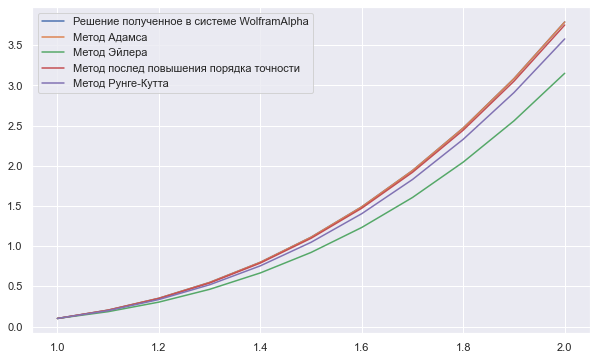

In [39]:
sns.lineplot(x=x, y=y)
sns.lineplot(x=sol_ad[0], y=sol_ad[1])
sns.lineplot(x=sol_eu[0], y=sol_eu[1])
sns.lineplot(x=sol_ia[0], y=sol_ia[1])
sns.lineplot(x=sol_rc[0], y=sol_rc[1])
plt.legend(labels=['Решение полученное в системе WolframAlpha', 
                  'Метод Адамса', 'Метод Эйлера',
                  'Метод послед повышения порядка точности',
                  'Метод Рунге-Кутта']);